<a href="https://colab.research.google.com/github/jonesarieh/Car-Price-and-Car-Class-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load csv file into Colab Notebook
df =pd.read_csv("/content/cars_price.csv")

In [5]:
df.head()  # Gives first 5 data's

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
df.shape  # Gives how many rows and columns

(205, 26)

In [8]:
df.isnull().sum()   # Check's whether nan is present

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Store Column names in separate variable
cols = df.columns.values.tolist()
print(cols)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [11]:
# Check whether some other identity is used for missing values
for each in cols:
  print(each,df[each].unique())

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

# ***--------------Data Preprocessing----------------***

# **1.Missing Values**

# normalized-losses -missing values

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [14]:
df.replace('?',np.nan,inplace=True)  #Replace '?' to nan

In [15]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['normalized-losses'] = SI.fit_transform(df[['normalized-losses']])

In [16]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# num of doors- missing values

In [17]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [18]:
SI = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
df['num-of-doors'] = SI.fit_transform(df[['num-of-doors']])

# Bore -missing values

In [19]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [20]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['bore'] = SI.fit_transform(df[['bore']])

# stroke - missing values

In [21]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [22]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['stroke'] = SI.fit_transform(df[['stroke']])

In [23]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# horsepower -missing values

In [24]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [25]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['horsepower'] = SI.fit_transform(df[['horsepower']])

# peak-rpm -missing values

In [26]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [27]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['peak-rpm'] = SI.fit_transform(df[['peak-rpm']])

In [28]:
df['peak-rpm'].unique()

array([5000.        , 5500.        , 5800.        , 4250.        ,
       5400.        , 5100.        , 4800.        , 6000.        ,
       4750.        , 4650.        , 4200.        , 4350.        ,
       4500.        , 5200.        , 4150.        , 5600.        ,
       5900.        , 5750.        , 5125.36945813, 5250.        ,
       4900.        , 4400.        , 6600.        , 5300.        ])

# Price - missing values

In [29]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [30]:
SI = SimpleImputer(strategy='mean',missing_values=np.nan)
df['price'] = SI.fit_transform(df[['price']])

In [31]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [32]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [35]:
df['price'] =df['price'].astype(int)   #Convert price column from float to int

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# **2.Feature Correlation**

<Axes: >

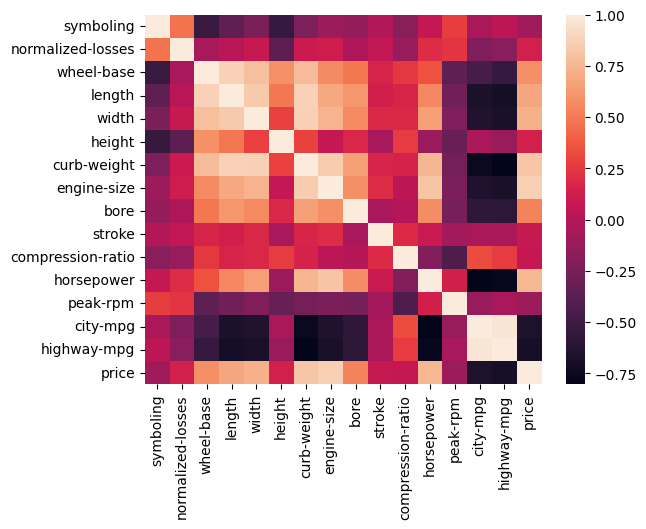

In [36]:
sns.heatmap(df.corr())

In [37]:
df.corr()['price'].sort_values()  

highway-mpg         -0.690526
city-mpg            -0.667449
peak-rpm            -0.100854
symboling           -0.082201
compression-ratio    0.070990
stroke               0.082095
normalized-losses    0.133999
height               0.134388
bore                 0.532300
wheel-base           0.583168
length               0.682986
width                0.728699
horsepower           0.757917
curb-weight          0.820825
engine-size          0.861752
price                1.000000
Name: price, dtype: float64

<ipython-input-38-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

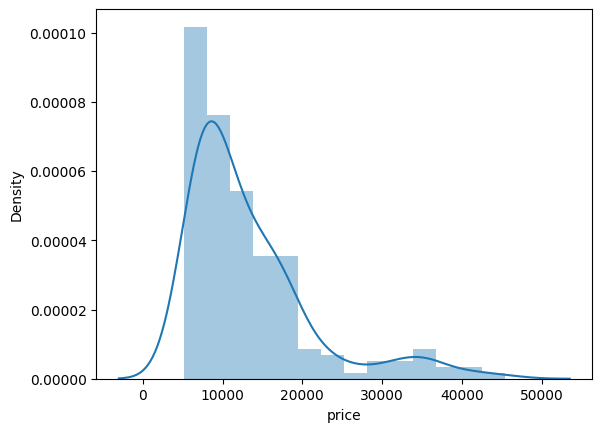

In [38]:
sns.distplot(df["price"])

# **3.Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
SS = StandardScaler()

In [41]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [43]:
df2 = df[['symboling', 'normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']].copy()

In [44]:
df2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [45]:
df3 = df[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','price']].copy()

In [46]:
df3

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470


In [47]:
df = df2.join(df3) 

In [48]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  make               205 non-null    object 
 16  fuel-type          205 non

<Axes: >

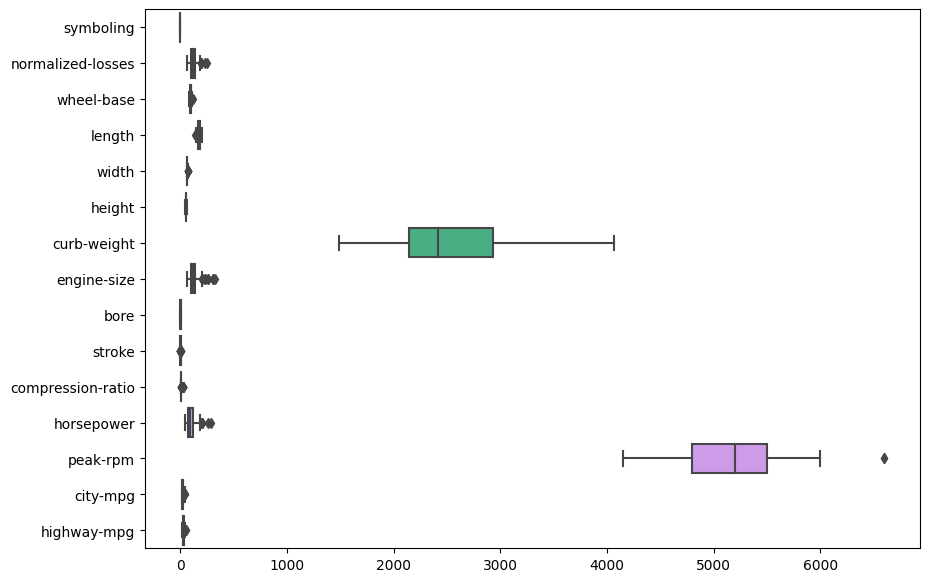

In [51]:
# Before Scaling
plt.figure(figsize=(10,7))
sns.boxplot(data=df.iloc[:,0:15],orient='h')

In [52]:
SS = StandardScaler()

In [53]:
df.iloc[:,0:15] = SS.fit_transform(df.iloc[:,0:15])

In [54]:
df.mean(axis=0)

<ipython-input-54-1c43c59c9f98>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


symboling            4.332578e-17
normalized-losses   -3.466062e-17
wheel-base          -1.291108e-15
length               3.656696e-15
width                1.089643e-15
height              -5.372396e-16
curb-weight          1.126470e-16
engine-size          3.466062e-17
bore                 7.625337e-16
stroke              -4.852487e-16
compression-ratio   -3.639365e-16
horsepower           2.274603e-16
peak-rpm             0.000000e+00
city-mpg             1.104807e-16
highway-mpg          1.473076e-16
price                1.320713e+04
dtype: float64

In [55]:
df.std(axis=0)

<ipython-input-55-64ab0bf95df5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std(axis=0)


symboling               1.002448
normalized-losses       1.002448
wheel-base              1.002448
length                  1.002448
width                   1.002448
height                  1.002448
curb-weight             1.002448
engine-size             1.002448
bore                    1.002448
stroke                  1.002448
compression-ratio       1.002448
horsepower              1.002448
peak-rpm                1.002448
city-mpg                1.002448
highway-mpg             1.002448
price                7868.768212
dtype: float64

<Axes: >

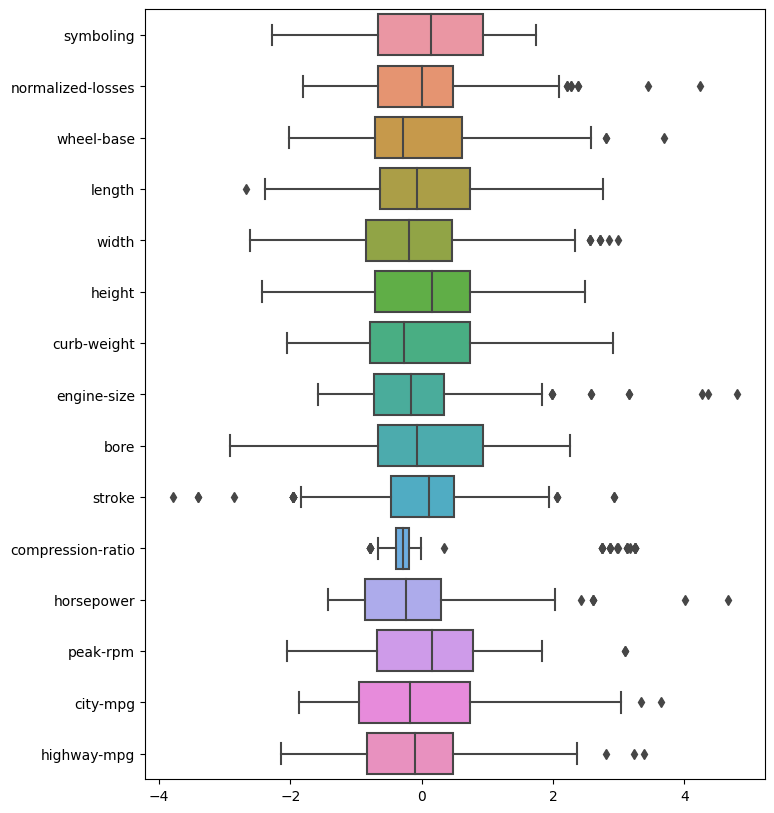

In [56]:
#After Scaling
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:15],orient='h')

In [58]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,...,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,...,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,...,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666463,-0.336996,...,gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845
201,-1.476452,-0.854332,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666463,-0.336996,...,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045
202,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926222,-1.232047,...,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485
203,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183465,0.462157,...,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470


<ipython-input-59-22c49f39a055>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,0:15])


<Axes: ylabel='Density'>

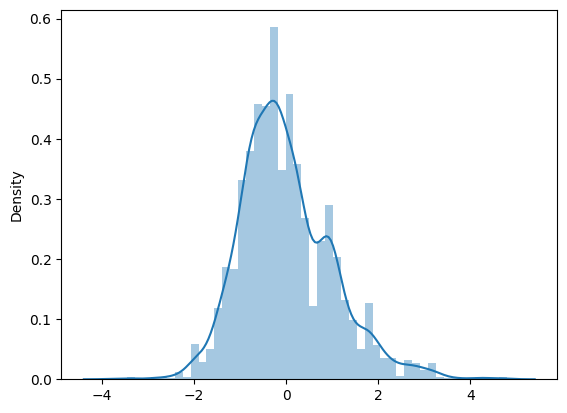

In [59]:
sns.distplot(df.iloc[:,0:15])

# **4.Categorical Features**

# Features categorical

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
OHE = OneHotEncoder(sparse =False)

In [62]:
OHE_2 = OHE.fit_transform(df[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','fuel-system','engine-type','num-of-cylinders']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
OHE_2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
Feature_labels = OHE.categories_

In [65]:
Feature_labels # This gives the column names

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object)]

In [66]:
arr1 = Feature_labels[0]
arr2 =Feature_labels[1]
arr3 =Feature_labels[2]
arr4 =Feature_labels[3]
arr5 =Feature_labels[4]
arr6 =Feature_labels[5]
arr7 =Feature_labels[6]
arr8 =Feature_labels[7]
arr9 =Feature_labels[8]
arr10 = Feature_labels[9]

In [67]:
cols =np.concatenate((arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10),axis =0)

In [68]:
cols

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'diesel', 'gas',
       'std', 'turbo', 'four', 'two', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front',
       'rear', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object)

In [69]:
new_features = pd.DataFrame(OHE_2,columns =cols)

In [70]:
new_features

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
df.drop(['make', 'fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','fuel-system','engine-type','num-of-cylinders'], axis=1, inplace=True)

In [72]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666463,-0.336996,-0.162161,0.247163,0.577180,-0.340094,-0.400490,16845
201,-1.476452,-0.854332,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666463,-0.336996,-0.364062,1.414003,0.367014,-0.953012,-0.837195,19045
202,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926222,-1.232047,-0.338824,0.754485,0.787346,-1.106241,-1.128332,21485
203,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183465,0.462157,3.244916,0.044234,-0.683816,0.119594,-0.546059,22470


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  price              205 non-null    int64  
dtypes: float64(15), int64(1)
m

In [74]:
new_features

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
df = df.join(new_features)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  price              205 non-null    int64  
 16  alfa-romero        205 non

In [77]:
dfprice = df[['price']]

In [78]:
del df['price']

In [79]:
df = df.join(dfprice)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  alfa-romero        205 non-null    float64
 16  audi               205 non

In [81]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,ohcv,rotor,eight,five,four,six,three,twelve,two,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17450


# **5.Removing Outliers**

<Axes: >

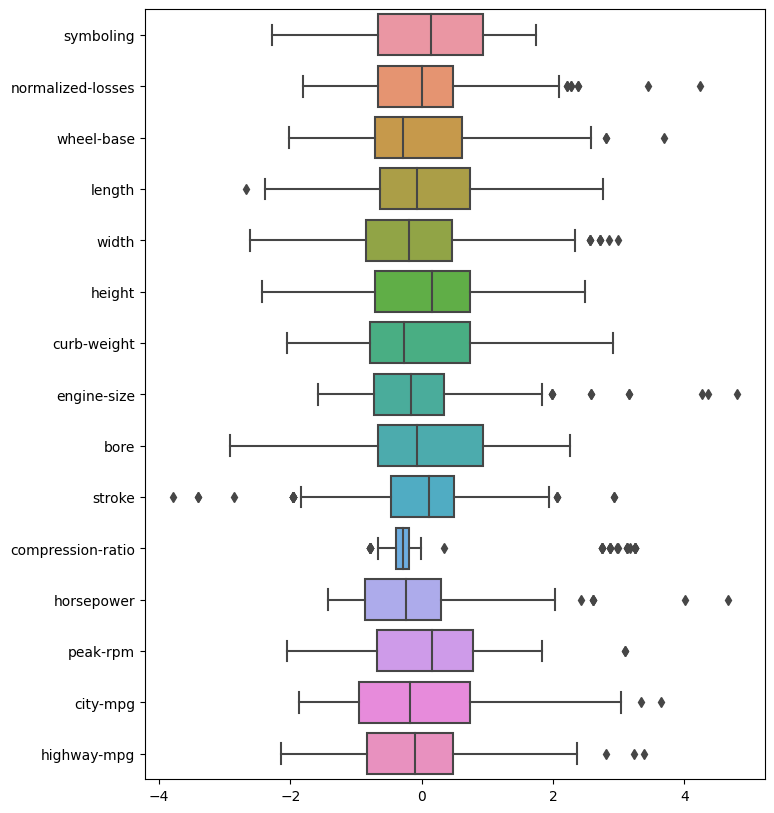

In [82]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:15],orient='h')

In [83]:
df.corr()['price'].sort_values()

highway-mpg   -0.690526
four          -0.679147
city-mpg      -0.667449
fwd           -0.589780
2bbl          -0.491504
                 ...   
width          0.728699
horsepower     0.757917
curb-weight    0.820825
engine-size    0.861752
price          1.000000
Name: price, Length: 76, dtype: float64

In [84]:
pd.set_option('display.max_columns', None)

# normalized-losses

In [85]:
Q1 =np.percentile(df['normalized-losses'],25)
Q3 =np.percentile(df['normalized-losses'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [86]:
indices = np.where(df['normalized-losses']>=max)

In [87]:
indices

(array([ 10,  11, 104, 105, 106, 178, 179, 190]),)

In [88]:
index_list =[]

In [89]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190]


In [90]:
df.shape

(205, 76)

# wheel base

In [91]:
Q1 =np.percentile(df['wheel-base'],25)
Q3 =np.percentile(df['wheel-base'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [92]:
indices = np.where(df['wheel-base']>=max)

In [93]:
indices

(array([70, 71, 73]),)

In [94]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73]


In [95]:
df.shape

(205, 76)

# width

In [96]:
Q1 =np.percentile(df['width'],25)
Q3 =np.percentile(df['width'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [97]:
indices = np.where(df['width']>=max)

In [98]:
indices

(array([  6,   7,   8,  70,  71,  73,  74, 129]),)

In [99]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129]


In [100]:
df.shape

(205, 76)

# Engine-size

In [101]:
Q1 =np.percentile(df['engine-size'],25)
Q3 =np.percentile(df['engine-size'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [102]:
indices = np.where(df['engine-size']>=max)

In [103]:
indices

(array([15, 16, 17, 47, 48, 49, 71, 72, 73, 74]),)

In [104]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74]


In [105]:
df.shape

(205, 76)

# stroke

In [106]:
Q1 =np.percentile(df['stroke'],25)
Q3 =np.percentile(df['stroke'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [107]:
indices = np.where(df['stroke']>=max)

In [108]:
indices

(array([ 29,  47,  48, 130, 131]),)

In [109]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131]


In [110]:
df.shape

(205, 76)

# compression-ratio

In [111]:
Q1 =np.percentile(df['compression-ratio'],25)
Q3 =np.percentile(df['compression-ratio'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [112]:
indices = np.where(df['compression-ratio']>=max)

In [113]:
indices

(array([ 49,  63,  66,  67,  68,  69,  70,  90, 108, 110, 112, 114, 116,
        158, 159, 174, 182, 184, 187, 192, 203]),)

In [114]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203]


In [115]:
df.shape

(205, 76)

# horse-power

In [116]:
Q1 =np.percentile(df['horsepower'],25)
Q3 =np.percentile(df['horsepower'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [117]:
indices = np.where(df['horsepower']>=max)

In [118]:
indices

(array([ 49, 105, 126, 127, 128, 129]),)

In [119]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129]


In [120]:
df.shape

(205, 76)

# wheel base

In [121]:
Q1 =np.percentile(df['peak-rpm'],25)
Q3 =np.percentile(df['peak-rpm'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [122]:
indices = np.where(df['peak-rpm']>=max)

In [123]:
indices

(array([165, 166]),)

In [124]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166]


In [125]:
df.shape

(205, 76)

# city-mpg

In [126]:
Q1 =np.percentile(df['city-mpg'],25)
Q3 =np.percentile(df['city-mpg'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [127]:
indices = np.where(df['city-mpg']>=max)

In [128]:
indices

(array([18, 30]),)

In [129]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166, 18, 30]


In [130]:
df.shape

(205, 76)

# highway-mpg

In [131]:
Q1 =np.percentile(df['highway-mpg'],25)
Q3 =np.percentile(df['highway-mpg'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [132]:
indices = np.where(df['highway-mpg']>=max)

In [133]:
indices

(array([18, 30, 90]),)

In [134]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166, 18, 30, 18, 30, 90]


In [135]:
df.shape

(205, 76)

# stroke - lower outliers

In [136]:
Q1 =np.percentile(df['stroke'],25)
Q3 =np.percentile(df['stroke'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [137]:
indices = np.where(df['stroke']<=min)

In [138]:
indices

(array([111, 113, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149]),)

In [139]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166, 18, 30, 18, 30, 90, 111, 113, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [140]:
df.shape

(205, 76)

# length lower outliers

In [141]:
Q1 =np.percentile(df['length'],25)
Q3 =np.percentile(df['length'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [142]:
indices = np.where(df['length']<=min)

In [143]:
indices

(array([18]),)

In [144]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166, 18, 30, 18, 30, 90, 111, 113, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 18]


In [145]:
df.shape

(205, 76)

<Axes: >

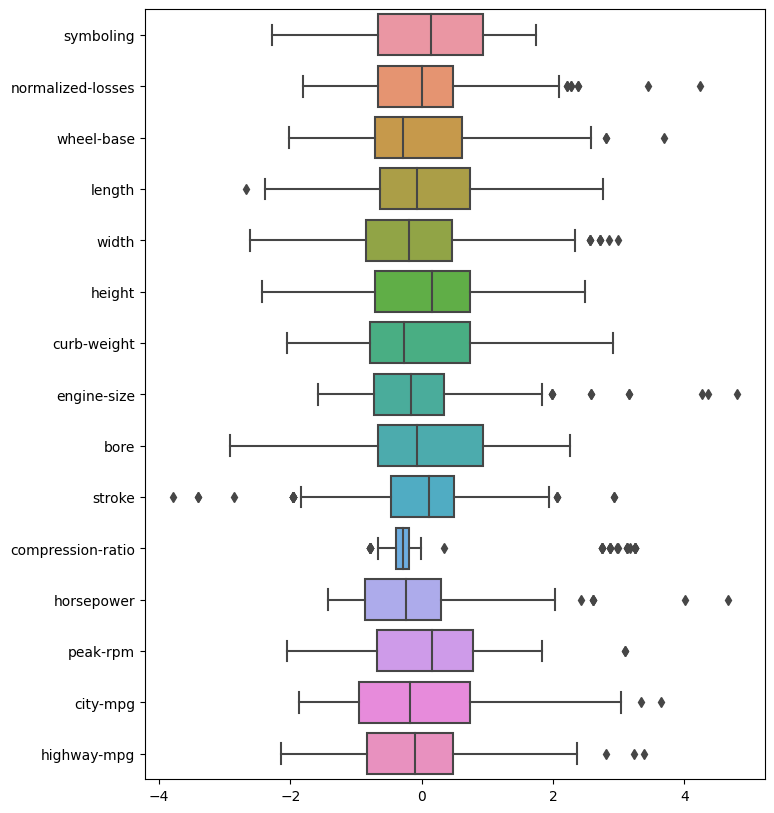

In [147]:
#Before Removing Outliers
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:15],orient='h')

**Dropping indices**

In [148]:
print(index_list)

[10, 11, 104, 105, 106, 178, 179, 190, 70, 71, 73, 6, 7, 8, 70, 71, 73, 74, 129, 15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 29, 47, 48, 130, 131, 49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192, 203, 49, 105, 126, 127, 128, 129, 165, 166, 18, 30, 18, 30, 90, 111, 113, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 18]


In [149]:
index_list = set(index_list)

In [150]:
index_list =list(index_list)

In [151]:
print(index_list)

[128, 129, 130, 131, 6, 7, 8, 134, 10, 11, 138, 139, 140, 15, 16, 17, 18, 141, 142, 143, 144, 145, 146, 147, 148, 149, 29, 158, 159, 30, 165, 166, 174, 47, 48, 49, 178, 179, 182, 184, 187, 190, 63, 192, 66, 67, 68, 69, 70, 71, 72, 73, 74, 203, 90, 104, 105, 106, 108, 110, 111, 112, 113, 114, 116, 126, 127]


In [152]:
len(index_list)

67

In [153]:
df.drop(index_list,inplace=True)

In [154]:
df.shape

(138, 76)

In [155]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1.476452,-1.518812,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074270,-0.336996,-0.666913,1.464736,-0.053318,-1.259470,-1.273900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18950
200,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666463,-0.336996,-0.162161,0.247163,0.577180,-0.340094,-0.400490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16845
201,-1.476452,-0.854332,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666463,-0.336996,-0.364062,1.414003,0.367014,-0.953012,-0.837195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19045
202,-1.476452,-0.854332,1.721

<Axes: >

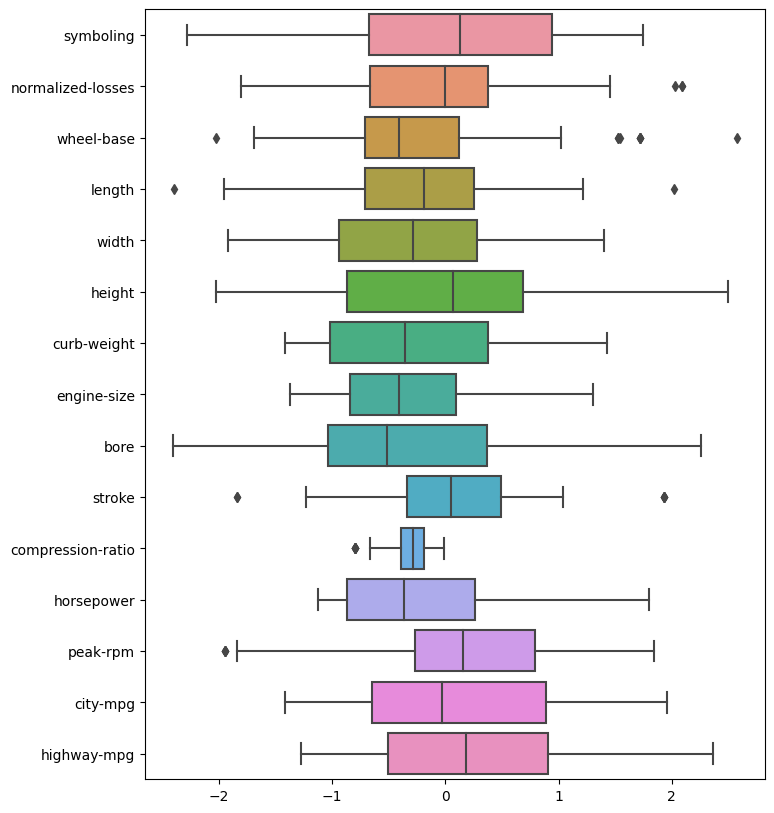

In [156]:
#After Removing Outliers
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:15],orient='h')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 204
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          138 non-null    float64
 1   normalized-losses  138 non-null    float64
 2   wheel-base         138 non-null    float64
 3   length             138 non-null    float64
 4   width              138 non-null    float64
 5   height             138 non-null    float64
 6   curb-weight        138 non-null    float64
 7   engine-size        138 non-null    float64
 8   bore               138 non-null    float64
 9   stroke             138 non-null    float64
 10  compression-ratio  138 non-null    float64
 11  horsepower         138 non-null    float64
 12  peak-rpm           138 non-null    float64
 13  city-mpg           138 non-null    float64
 14  highway-mpg        138 non-null    float64
 15  alfa-romero        138 non-null    float64
 16  audi               138 non

In [158]:
df.shape

(138, 76)

In [159]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1.476452,-1.518812,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,1.074270,-0.336996,-0.666913,1.464736,-0.053318,-1.259470,-1.273900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18950
200,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666463,-0.336996,-0.162161,0.247163,0.577180,-0.340094,-0.400490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16845
201,-1.476452,-0.854332,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666463,-0.336996,-0.364062,1.414003,0.367014,-0.953012,-0.837195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19045
202,-1.476452,-0.854332,1.721

# **Machine Learning**

# **Splitting X and y**

In [160]:
X = df.drop('price',axis=1)
y = df['price']

In [161]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13495
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16500
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16500
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13950
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17450


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [164]:
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
88,-1.476452,0.474629,-0.408949,-0.134009,-0.237296,-0.871725,-0.293730,-0.407003,-0.591272,6.539537e-01,-0.666913,0.297895,0.787346,-0.340094,-0.109354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23,0.133509,-0.126568,-0.841772,-1.360937,-0.984972,-1.199923,-0.823178,-0.695874,-1.109441,4.301908e-01,-0.641675,-0.057230,0.787346,-0.186865,-0.109354,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,-0.671472,-1.297319,-0.708596,-1.239057,-1.078431,-0.707626,-1.244811,-0.888455,-1.109441,-4.648606e-01,-0.136923,-0.868945,0.577180,1.958346,1.783034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
172,0.938490,0.379703,-0.059361,0.174754,-0.143836,-0.297379,0.807522,0.459611,1.074270,7.818182e-01,-0.212636,0.297895,-0.683816,-0.186865,-0.109354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,-0.671472,-1.170751,-0.375655,0.109752,-0.330755,0.153893,-0.484331,-0.407003,-0.665296,1.037547e+00,-0.288349,-0.463087,1.417844,0.272823,0.327351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.671472,-0.506271,-0.259126,-0.052755,-0.330755,0.400041,-0.488182,-0.166277,0.000921,6.859198e-01,-0.414537,-0.184060,0.156848,0.272823,0.472920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57,1.743470,0.885974,-0.575419,-0.410271,-0.097107,-1.692220,-0.328385,-1.369907,0.000000,-1.419581e-15,-0.187398,-0.082596,1.838176,-1.259470,-1.128332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,0.133509,-0.664480,-0.841772,-1.954087,-0.891512,-0.461478,-1.185128,-0.840310,-1.553585,4.941231e-01,-0.237874,-0.716748,1.838176,0.732511,0.472920,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,0.133509,-0.601197,-0.7085

In [165]:
y_train

88      9279
23      7957
20      6575
172    17669
39      8845
       ...  
100     9549
57     13645
33      6529
97      7999
24      6229
Name: price, Length: 110, dtype: int64

# ***----------------Model Selection---------------***

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

Linear Regression

In [172]:
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1689.0767161464034
Mean_squared_Error: 6028647.992673053
R2_score: 0.592354427613552


SGD Regressor

In [173]:
sgd= SGDRegressor()
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1414.2700424608502
Mean_squared_Error: 4009763.4449510807
R2_score: 0.7288675144679351


KNN Algorithm

In [174]:
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1434.2857142857142
Mean_squared_Error: 3830881.34
R2_score: 0.7409631780646653


Decision Tree Regressor


In [175]:
dtr = DecisionTreeRegressor(random_state=2)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1630.75
Mean_squared_Error: 5625152.767857143
R2_score: 0.619637998005319


Random Forest Regressor

In [176]:
rf =RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1409.4097321428574
Mean_squared_Error: 3122752.9170001745
R2_score: 0.7888454589123292


Gradient Boosting Regressor

In [177]:
gb =GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1324.33144295429
Mean_squared_Error: 2704369.047418147
R2_score: 0.817135770803205


### 1.Gradient Boosting
### 2.Random Forest
### 3.Gradient Descent -SGD



# ***-------------Model Training-------------------***

# **Tuning HyperParameters**

# **1. Gradient Boosting**

In [262]:
gb =GradientBoostingRegressor()
gb.fit(X_train,y_train)
train_score=gb.score(X_train,y_train)
print('Train_score:',train_score)
y_pred = gb.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Train_score: 0.9892400322357601
Mean_absolute_Error: 1329.6173428878956
Mean_squared_Error: 2712450.2989450083
R2_score: 0.8165893321310068


In [179]:
from sklearn.model_selection import GridSearchCV

In [263]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'learning_rate':[0.01,0.1],'max_depth':[3,4,5]}

In [253]:
gb_model = GradientBoostingRegressor()

In [254]:
grid = GridSearchCV(gb_model,param_grid)

In [255]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [256]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40}

In [260]:
gb =GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=40)
gb.fit(X_train,y_train)
train_score=gb.score(X_train,y_train)
print('Train_score:',train_score)
y_pred = gb.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)


Train_score: 0.9893011887095944
Mean_absolute_Error: 1421.1143153925277
Mean_squared_Error: 3444440.3329842794
R2_score: 0.767093575077391


In [207]:
test_res = y_test - y_pred

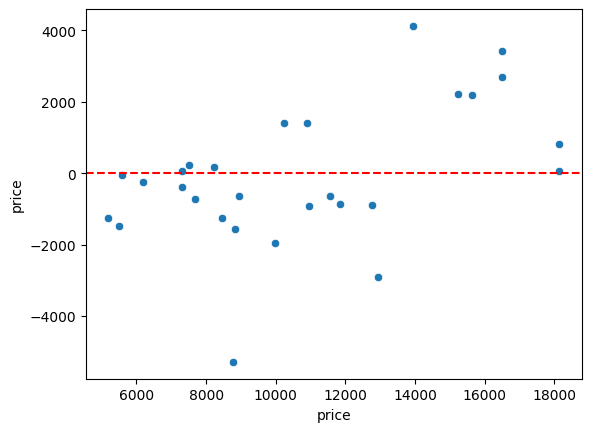

In [208]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

# **2.Random forest**

In [268]:
rf =RandomForestRegressor()
rf.fit(X_train,y_train)
train_score=rf.score(X_train,y_train)
print('Train_score:',train_score)
y_pred = rf.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Train_score: 0.9695863277630878
Mean_absolute_Error: 1326.6109523809523
Mean_squared_Error: 2650667.682085318
R2_score: 0.8207669537542812


In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
param_grid = {"n_estimators":[1,5,10,20,40,100,200,500],'max_depth':[3,4,5,6]}

In [271]:
rf_model = RandomForestRegressor()

In [279]:
grid = GridSearchCV(rf_model,param_grid)

In [295]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200, 500]})

In [296]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [300]:
rf =RandomForestRegressor(max_depth=6,n_estimators=100)
rf.fit(X_train,y_train)
train_score=rf.score(X_train,y_train)
print('Train_score:',train_score)
y_pred = rf.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Train_score: 0.9654252890757806
Mean_absolute_Error: 1323.105069240868
Mean_squared_Error: 2644572.3783170977
R2_score: 0.8211791064619008


In [301]:
df['price'].mean()

10879.920289855072

In [302]:
test_res = y_test - y_pred

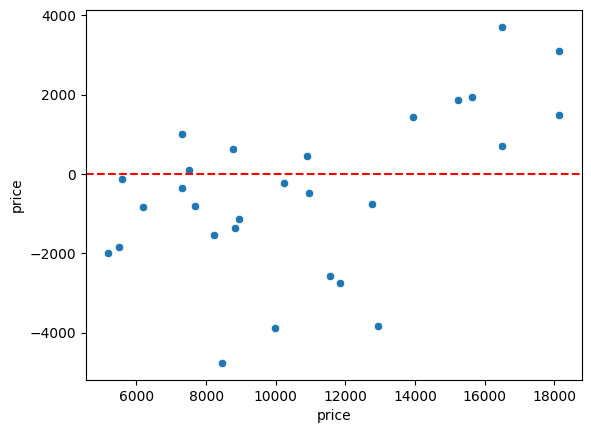

In [320]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

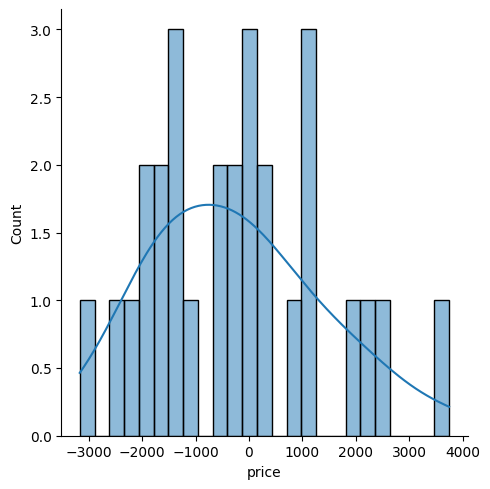

In [304]:
sns.displot(test_res,bins=25,kde=True)

# **3.SGD Regressor**

In [307]:
sgd= SGDRegressor()
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Mean_absolute_Error: 1420.4479458147634
Mean_squared_Error: 4082324.155255617
R2_score: 0.7239610989132685


In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
param_grid = {'alpha': [0.1,0.001,0.0001],'max_iter':[2000,5000,10000]}

In [310]:
sgd_model = SGDRegressor()

In [311]:
grid = GridSearchCV(sgd_model,param_grid,cv=10)

In [312]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.001, 0.0001],
                         'max_iter': [2000, 5000, 10000]})

In [313]:
grid.best_params_

{'alpha': 0.1, 'max_iter': 5000}

In [316]:
sgd= SGDRegressor(alpha=0.1,max_iter=5000)
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)


Mean_absolute_Error: 1632.0632595078357
Mean_squared_Error: 4246985.36497303
R2_score: 0.7128270248776509


# ***-------------Model Evaluating------------***

In [332]:
rf =RandomForestRegressor(max_depth=6,n_estimators=100)
rf.fit(X_train,y_train)
train_score=rf.score(X_train,y_train)
print('Train_score:',train_score)
y_pred = rf.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)
print('Mean_absolute_Error:', MAE)
print('Mean_squared_Error:',MSE)
print('R2_score:',r2_score)

Train_score: 0.9645259644555331
Mean_absolute_Error: 1291.810286728782
Mean_squared_Error: 2489119.394519612
R2_score: 0.8316905379862366


# **Final Model**

In [334]:
final_model = RandomForestRegressor(max_depth=6,n_estimators=100)

In [337]:
final_model.fit(X,y)
final_model.score(X,y)


0.9667889313791542

In [338]:
y_hat = final_model.predict(X)

In [339]:
residuals = y_hat - y

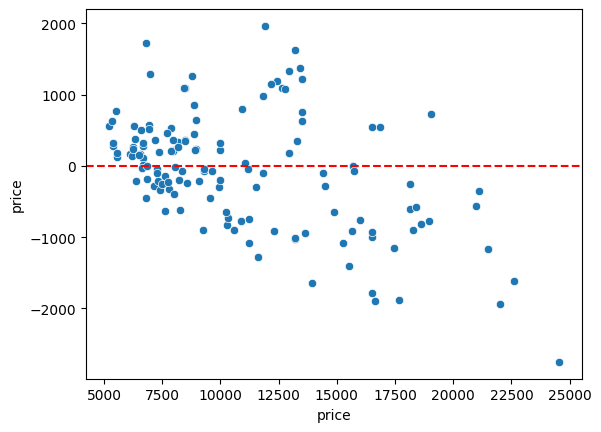

In [340]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

# **Predict New Data of Car Price Prediction**

In [341]:
new_data=df.iloc[0].tolist()

In [342]:
print(new_data)

[1.7434704321932961, 0.0, -1.6907718018201774, -0.42652146835701304, -0.8447823517277104, -2.0204173044647122, -0.014566282137926123, 0.0744489251157203, 0.5190893539874548, -1.8394037455912715, -0.2883489098618655, 0.17106493302377107, -0.263484002461064, -0.6465530277621856, -0.5460587369032711, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13495.0]


In [343]:
new_car_details = new_data[0:-1]
price_before_prediction = new_data[-1]
print('car_details:',new_car_details)
print('Actual_price:',price_before_prediction)

car_details: [1.7434704321932961, 0.0, -1.6907718018201774, -0.42652146835701304, -0.8447823517277104, -2.0204173044647122, -0.014566282137926123, 0.0744489251157203, 0.5190893539874548, -1.8394037455912715, -0.2883489098618655, 0.17106493302377107, -0.263484002461064, -0.6465530277621856, -0.5460587369032711, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Actual_price: 13495.0


In [344]:
predicted_price=final_model.predict([new_car_details])
print('Predicted_Price',predicted_price[0])

Predicted_Price 14715.681798419328


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Actual Price: 13495**
# **Predicted Price: 14715**